In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hotel_df = pd.read_csv("H1.csv",
                       parse_dates= {"ArrivalDate" : ["ArrivalDateYear","ArrivalDateMonth","ArrivalDateDayOfMonth"]},
                       index_col="ArrivalDate",
                       keep_date_col=True)

In [3]:
hotel_df["Date(Year and Week Number)"] = hotel_df['ArrivalDateYear'].astype(str) + hotel_df['ArrivalDateWeekNumber'].astype(str)
hotel_df

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Date(Year and Week Number)
ArrivalDate,,,,,,,,,,,,,,,,,,,,,
2015-07-01,0,342,2015,July,27,1,0,0,2,0,...,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01,201527
2015-07-01,0,737,2015,July,27,1,0,0,2,0,...,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01,201527
2015-07-01,0,7,2015,July,27,1,0,1,1,0,...,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02,201527
2015-07-01,0,13,2015,July,27,1,0,1,1,0,...,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02,201527
2015-07-01,0,14,2015,July,27,1,0,2,2,0,...,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03,201527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31,0,212,2017,August,35,31,2,8,2,1,...,143,NULL,0,Transient,89.75,0,0,Check-Out,2017-09-10,201735
2017-08-30,0,169,2017,August,35,30,2,9,2,0,...,250,NULL,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10,201735
2017-08-29,0,204,2017,August,35,29,4,10,2,0,...,250,NULL,0,Transient,153.57,0,3,Check-Out,2017-09-12,201735


In [4]:
weekly_cancel = hotel_df.groupby("Date(Year and Week Number)")["IsCanceled"].sum().to_frame()
weekly_cancel

,IsCanceled
Date(Year and Week Number),
201527,41
201528,48
201529,87
201530,74
201531,101
...,...
20175,51
20176,91
20177,96


In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [7]:
weekly_cancel = hotel_df.resample("W-SAT")['IsCanceled'].sum()
weekly_cancel

ArrivalDate
2015-07-04     41
2015-07-11     48
2015-07-18     87
2015-07-25     74
2015-08-01    101
             ... 
2017-08-05    173
2017-08-12    140
2017-08-19    182
2017-08-26    143
2017-09-02    100
Freq: W-SAT, Name: IsCanceled, Length: 114, dtype: int64

<AxesSubplot:xlabel='ArrivalDate'>

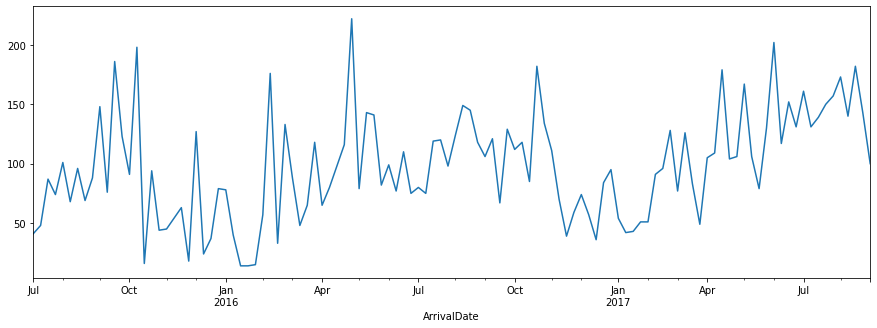

In [17]:
weekly_cancel.plot(figsize=(15,5))

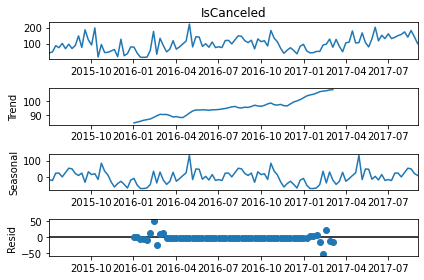

In [15]:
decomposition =seasonal_decompose(weekly_cancel)
decomposition.plot();


In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

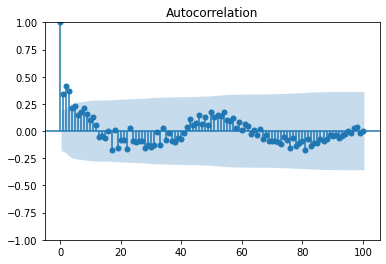

In [72]:
plot_acf(weekly_cancel,lags=100);

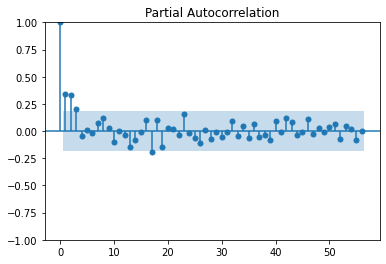

In [76]:
plot_pacf(weekly_cancel, lags=56, method="ywm");

<AxesSubplot:xlabel='ArrivalDate'>

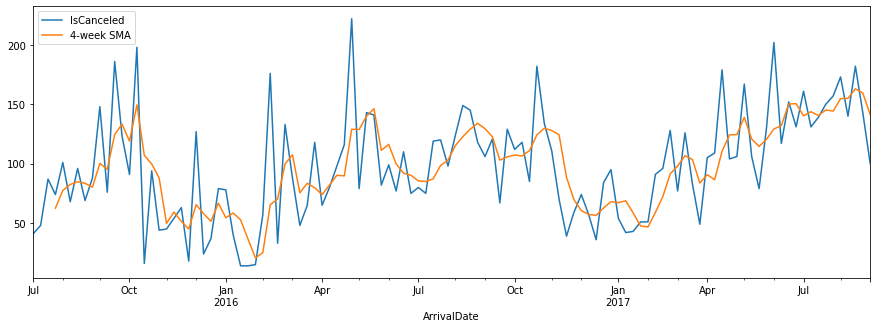

In [56]:
weekly_cancel.plot(figsize=(15,5), legend=True)
weekly_cancel.rolling(window=4).mean().rename('4-week SMA').plot(legend=True)

In [38]:
test_size = int(len(weekly_cancel)*0.1)
train = weekly_cancel[:-test_size]
test = weekly_cancel[-test_size:]

In [48]:
auto_arima(weekly_cancel,stationary=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -579.924
Date:                Thu, 28 Oct 2021   AIC                           1169.848
Time:                        20:43:02   BIC                           1183.529
Sample:                             0   HQIC                          1175.400
                                - 114                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     23.8993     10.892      2.194      0.028       2.551      45.248
ar.L1          0.7532      0.108      6.949      0.000       0.541       0.966
ma.L1         -0.5982      0.130     -4.589      0.000      -0.854      -0.343
ma.L2          0.2567      0.109      2.363      0.018       0.044       0.470
sigma2      1528.6351    189.299      8.075      0.000    1157.616    1899.654
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.90
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                             0.66
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
auto_arima(weekly_cancel).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -578.816
Date:                Thu, 28 Oct 2021   AIC                           1161.631
Time:                        20:45:50   BIC                           1167.086
Sample:                             0   HQIC                          1163.845
                                - 114                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7425      0.063    -11.778      0.000      -0.866      -0.619
sigma2      1635.1805    167.178      9.781      0.000    1307.518    1962.843
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):                14.62
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             0.62
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [96]:
model_sarimax = SARIMAX(train,order=(1,0,2))
results = model_sarimax.fit()
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(1,0,2) Predictions')
error = mean_squared_error(test, predictions)
error

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.16596D+00    |proj g|=  5.71067D-02

At iterate    5    f=  5.16196D+00    |proj g|=  2.41998D-03

At iterate   10    f=  5.15987D+00    |proj g|=  3.71452D-03

At iterate   15    f=  5.15981D+00    |proj g|=  3.14842D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   7.454D-06   5.160D+00
  F =   5.1597743190719383     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


640.5262831122812

<AxesSubplot:xlabel='ArrivalDate'>

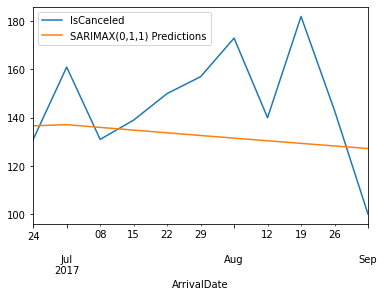

In [89]:
test.plot(legend=True)
predictions.plot(legend=True)

In [92]:
model_arima = ARIMA(train,order=(1,0,2))
results = model_arima.fit()
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end).rename('ARIMA(1,0,2) Predictions')
error = mean_squared_error(test, predictions)
error

In [97]:
model_sarimax = SARIMAX(train,order=(0,1,1))
results = model_sarimax.fit()
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(0,1,1) Predictions')
error = mean_squared_error(test, predictions)
error

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.10900D+00    |proj g|=  1.24211D-02

At iterate    5    f=  5.10670D+00    |proj g|=  5.71128D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     10      1     0     0   8.958D-06   5.107D+00
  F =   5.1065808522607252     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


536.4463812536989